In [1]:
import numpy as np
file_path = '/home/krishna/Downloads/mnist.npz'
file = np.load(file_path)
x_train=file['x_train']
y_train=file['y_train']

In [2]:
X = []
Y = []
for i in range(y_train.shape[0]):
    if y_train[i] == 0:
        X.append(x_train[i])
        Y.append(-1)
    elif y_train[i]==1:
        X.append(x_train[i])
        Y.append(y_train[i])

X = np.array(X)
Y = np.array(Y)

In [3]:
print(X.shape)
print(Y.shape)

(12665, 28, 28)
(12665,)


In [4]:
print(Y)

[-1  1  1 ...  1 -1  1]


In [5]:

X_flat = X.reshape(X.shape[0], -1)

mean_vec = np.mean(X_flat, axis=0)

centered_data = X_flat - mean_vec
cov_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
p = 5
pca_matrix = eigenvectors[:, :p]
X_train = np.dot(centered_data, pca_matrix)


In [6]:
print(X_train)
print("-"*100)
print(X_train.shape)

[[-1119.66338805  -321.49791034   402.41141565   219.14716332
   -144.27936838]
 [  883.61589229  -907.38629475  -622.50355094   -94.58850625
   -270.5902168 ]
 [  798.39309385   842.90971227   484.0627968    -16.35519247
   -209.62860077]
 ...
 [  726.57401035  -652.36435206  -528.07971075  -169.6290383
   -748.7172408 ]
 [ -816.3685892   -679.5585419    625.93484031  1072.03355385
   -304.59712958]
 [  821.88725405  -356.09638457  -491.30448403   -78.84106524
   -649.7960371 ]]
----------------------------------------------------------------------------------------------------
(12665, 5)


In [7]:
val = []
val_labels = []
cnt = 0
cnt1 = 0
X_train_filtered = []
Y_train_filtered = []

for i in range(len(X_train)):
    if cnt < 1000 and Y[i] == 1:
        val.append(X_train[i])
        val_labels.append(Y[i])
        cnt += 1
    elif cnt1 < 1000 and Y[i] == -1:
        val.append(X_train[i])
        val_labels.append(Y[i])
        cnt1 += 1
    else:
        X_train_filtered.append(X_train[i])
        Y_train_filtered.append(Y[i])


X_train_filtered = np.array(X_train_filtered)
Y_train_filtered = np.array(Y_train_filtered)
val = np.array(val)
val_labels = np.array(val_labels)
print(X_train_filtered.shape)
print(Y_train_filtered.shape)
print(val.shape)
print(val_labels.shape)

(10665, 5)
(10665,)
(2000, 5)
(2000,)


In [8]:
import pandas as pd
x_train= pd.DataFrame(X_train_filtered)
y_train=pd.DataFrame(Y_train_filtered)
x_val=pd.DataFrame(val)
y_val=pd.DataFrame(val_labels)

In [9]:
y_train.rename(columns = {0:'labels'}, inplace = True) 
y_val.rename(columns = {0:'labels'}, inplace = True) 
y_train

,labels
0,1
1,1
2,1
3,1
4,1
...,...
10660,-1
10661,1
10662,1
10663,-1


In [10]:
X= pd.concat([x_train, y_train], axis=1)
X

,0,1,2,3,4,labels
0,933.455454,-825.527679,-586.699437,-134.772129,-82.112395,1
1,1054.391175,-355.499329,-371.049525,22.697298,248.554247,1
2,963.446416,-965.210652,-566.447421,-93.096714,-104.525335,1
3,1100.425644,-361.657767,-89.707482,87.823554,683.560611,1
4,893.719067,-1091.013461,-492.717357,-126.427731,113.285620,1
...,...,...,...,...,...,...
10660,-807.485744,-719.262248,978.667043,703.758608,-177.065399,-1
10661,923.824668,-573.430566,-554.928473,-72.293544,-386.716880,1
10662,726.574010,-652.364352,-528.079711,-169.629038,-748.717241,1
10663,-816.368589,-679.558542,625.934840,1072.033554,-304.597130,-1


In [11]:
V=pd.concat([x_val, y_val], axis=1)
V

,0,1,2,3,4,labels
0,-1119.663388,-321.497910,402.411416,219.147163,-144.279368,-1
1,883.615892,-907.386295,-622.503551,-94.588506,-270.590217,1
2,798.393094,842.909712,484.062797,-16.355192,-209.628601,1
3,863.614849,752.822365,363.947142,63.756511,-440.838191,1
4,898.965176,706.871855,275.507597,45.735106,-279.794245,1
...,...,...,...,...,...,...
1995,-1164.270704,-296.178595,322.905886,1066.644976,-21.832204,-1
1996,-43.239182,-494.844914,795.229500,-617.109083,434.810906,-1
1997,-861.295295,-397.560997,503.156433,985.058719,-128.299049,-1
1998,-1150.387124,-979.351706,675.508372,682.091298,196.682130,-1


In [12]:
X.columns = ["Feature_1", "Feature_2", "Feature_3", "Feature_4", "Feature_5", "Label"]


In [13]:
weight = 1 / len(X)
X['Weight'] = weight
print(X.info())
print(X.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10665 entries, 0 to 10664
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  10665 non-null  float64
 1   Feature_2  10665 non-null  float64
 2   Feature_3  10665 non-null  float64
 3   Feature_4  10665 non-null  float64
 4   Feature_5  10665 non-null  float64
 5   Label      10665 non-null  int64  
 6   Weight     10665 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 583.4 KB
None
     Feature_1    Feature_2   Feature_3   Feature_4   Feature_5  Label  \
0   933.455454  -825.527679 -586.699437 -134.772129  -82.112395      1   
1  1054.391175  -355.499329 -371.049525   22.697298  248.554247      1   
2   963.446416  -965.210652 -566.447421  -93.096714 -104.525335      1   
3  1100.425644  -361.657767  -89.707482   87.823554  683.560611      1   
4   893.719067 -1091.013461 -492.717357 -126.427731  113.285620      1   

     Weight  
0  0.000094  
1 

In [14]:
import numpy as np

def find_best_split(X, y):
    best_feature = None
    best_split = None
    min_error = float('inf')
    for feature in range(X.shape[1]):
        unique_values = np.unique(X[:, feature])
        unique_values.sort()
        midpoints = (unique_values[:-1] + unique_values[1:]) / 2

        for split in midpoints:
            left_indices = X[:, feature] <= split
            right_indices = X[:, feature] > split

            error_left = np.sum(y[left_indices] != -1) / np.sum(left_indices)
            error_right = np.sum(y[right_indices] != 1) / np.sum(right_indices)
            weighted_error = (np.sum(left_indices) * error_left + np.sum(right_indices) * error_right) / len(y)

            if weighted_error < min_error:
                min_error = weighted_error
                best_feature = feature
                best_split = split

    return best_feature, best_split

best_feature, best_split = find_best_split(X_train_filtered, Y_train_filtered)

print("Best feature:", best_feature)
print("Best split:", best_split)


Best feature: 0
Best split: 206.7422994970151


In [15]:
pred=[]
for i in range(len(X_train_filtered)):
    if X_train_filtered[i][0]<206:
        pred.append(-1)
    else:
        pred.append(1)
cnt=0
for i in range(len(pred)):
    if pred[i]==Y_train_filtered[i]:
        cnt+=1
print(cnt/len(pred))

0.9952180028129395


In [16]:
X['Initial_Predictions'] = pred
X

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Label,Weight,Initial_Predictions
0,933.455454,-825.527679,-586.699437,-134.772129,-82.112395,1,0.000094,1
1,1054.391175,-355.499329,-371.049525,22.697298,248.554247,1,0.000094,1
2,963.446416,-965.210652,-566.447421,-93.096714,-104.525335,1,0.000094,1
3,1100.425644,-361.657767,-89.707482,87.823554,683.560611,1,0.000094,1
4,893.719067,-1091.013461,-492.717357,-126.427731,113.285620,1,0.000094,1
...,...,...,...,...,...,...,...,...
10660,-807.485744,-719.262248,978.667043,703.758608,-177.065399,-1,0.000094,-1
10661,923.824668,-573.430566,-554.928473,-72.293544,-386.716880,1,0.000094,1
10662,726.574010,-652.364352,-528.079711,-169.629038,-748.717241,1,0.000094,1
10663,-816.368589,-679.558542,625.934840,1072.033554,-304.597130,-1,0.000094,-1


In [17]:
wrongly_classified_count = np.sum(X['Label'] != X['Initial_Predictions'])
print("Number of wrongly classified instances:", wrongly_classified_count)

Number of wrongly classified instances: 51


In [18]:
te=51/10665
k=1-te
print(k,te)
weight_update_factor = 0.5*np.log((k) / te)
weight_update_factor

0.9952180028129395 0.004781997187060478


2.669051765331757

In [19]:
for index, row in X.iterrows():
    weight_update = weight_update_factor * row['Label'] * row['Initial_Predictions'] * row['Weight']
    X.at[index, 'Weight'] *= weight_update

print(X)

         Feature_1    Feature_2   Feature_3    Feature_4   Feature_5  Label  \
0       933.455454  -825.527679 -586.699437  -134.772129  -82.112395      1   
1      1054.391175  -355.499329 -371.049525    22.697298  248.554247      1   
2       963.446416  -965.210652 -566.447421   -93.096714 -104.525335      1   
3      1100.425644  -361.657767  -89.707482    87.823554  683.560611      1   
4       893.719067 -1091.013461 -492.717357  -126.427731  113.285620      1   
...            ...          ...         ...          ...         ...    ...   
10660  -807.485744  -719.262248  978.667043   703.758608 -177.065399     -1   
10661   923.824668  -573.430566 -554.928473   -72.293544 -386.716880      1   
10662   726.574010  -652.364352 -528.079711  -169.629038 -748.717241      1   
10663  -816.368589  -679.558542  625.934840  1072.033554 -304.597130     -1   
10664   821.887254  -356.096385 -491.304484   -78.841065 -649.796037      1   

             Weight  Initial_Predictions  
0      2

In [20]:
def find_best_split(X, y):
    best_feature = None
    best_split = None
    min_error = float('inf')
    for feature in X.columns:
        unique_values = np.unique(X[feature])
        unique_values.sort()
        midpoints = (unique_values[:-1] + unique_values[1:]) / 2

        for split in midpoints:
            left_indices = X[feature] <= split
            right_indices = X[feature] > split

            error_left = np.sum(y[left_indices] != -1) / np.sum(left_indices)
            error_right = np.sum(y[right_indices] != 1) / np.sum(right_indices)
            weighted_error = (np.sum(left_indices) * error_left + np.sum(right_indices) * error_right) / len(y)

            if weighted_error < min_error:
                min_error = weighted_error
                best_feature = feature
                best_split = split

    return best_feature, best_split

In [21]:

n_estimators = 3

weak_learners = []
alphas = []

weight = 1 / len(X)
X['Weight'] = weight

for _ in range(n_estimators):
    print(X)
    print("--"*50)
    best_feature, best_split = find_best_split(X[['Feature_1', 'Feature_2', 'Feature_3','Feature_4','Feature_5']], X['Label'])
    print("Best feature:", best_feature)
    
    predictions = np.where(X[best_feature] <= best_split, -1, 1)

    weights=np.sum(X['Weight'])
    
    weighted_error = np.sum(X['Weight'][X['Label'] != predictions])

    weighted_error=(weighted_error)/weights

    alpha = 0.5 * np.log((1 - weighted_error) / weighted_error)

    X['Weight'] *= np.exp(-alpha * X['Label'] * predictions)

    total_weight = np.sum(X['Weight'])
    X['Weight'] /= total_weight

    weak_learners.append((best_feature, best_split))
    alphas.append(alpha)

         Feature_1    Feature_2   Feature_3    Feature_4   Feature_5  Label  \
0       933.455454  -825.527679 -586.699437  -134.772129  -82.112395      1   
1      1054.391175  -355.499329 -371.049525    22.697298  248.554247      1   
2       963.446416  -965.210652 -566.447421   -93.096714 -104.525335      1   
3      1100.425644  -361.657767  -89.707482    87.823554  683.560611      1   
4       893.719067 -1091.013461 -492.717357  -126.427731  113.285620      1   
...            ...          ...         ...          ...         ...    ...   
10660  -807.485744  -719.262248  978.667043   703.758608 -177.065399     -1   
10661   923.824668  -573.430566 -554.928473   -72.293544 -386.716880      1   
10662   726.574010  -652.364352 -528.079711  -169.629038 -748.717241      1   
10663  -816.368589  -679.558542  625.934840  1072.033554 -304.597130     -1   
10664   821.887254  -356.096385 -491.304484   -78.841065 -649.796037      1   

         Weight  Initial_Predictions  
0      0.000

In [ ]:
stumps=[]

In [23]:

n_estimators = 300

weak_learners = []
alphas = []

weight = 1 / len(X)
X['Weight'] = weight

val_accuracies=[]

for _ in range(n_estimators):
    print("--"*50)
    best_feature, best_split = find_best_split(X[['Feature_1', 'Feature_2', 'Feature_3','Feature_4','Feature_5']], X['Label'])
    
    predictions = np.where(X[best_feature] <= best_split, -1, 1)

    weights=np.sum(X['Weight'])
    
    weighted_error = np.sum(X['Weight'][X['Label'] != predictions])

    weighted_error=(weighted_error)/weights

    alpha = 0.5 * np.log((1 - weighted_error) / weighted_error)

    X['Weight'] *= np.exp(-alpha * X['Label'] * predictions)

    total_weight = np.sum(X['Weight'])
    X['Weight'] /= total_weight

    weak_learners.append((best_feature, best_split))
    alphas.append(alpha)
    predi=[]
    for i in range(len(val)):
        k=int(best_feature[-1])
        if float(val[i][k-1])<float(best_split):
            predi.append(-1)
        else:
            predi .append(1)
    CNT=0
    for i in range(len(val)):
        if val_labels[i]==predi[i]:
            CNT+=1
    val_accuracies.append(CNT/len(predi))  


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------

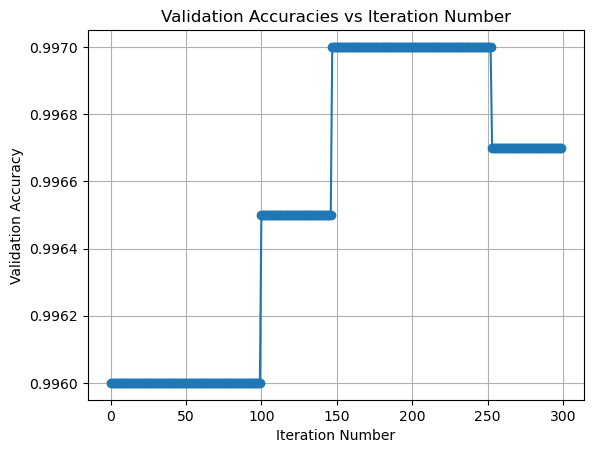

In [42]:

import matplotlib.pyplot as plt
plt.plot(range(len(val_accuracies)), val_accuracies, marker='o')
plt.xlabel('Iteration Number')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracies vs Iteration Number')
plt.grid(True)
plt.show()

In [52]:
file_path = '/home/krishna/Downloads/mnist.npz'
file = np.load(file_path)
X_test=file['x_test']
Y_test=file['y_test']

In [53]:
X_test=file['x_test']
Y_test=file['y_test']
X = []
Y = []
for i in range(X_test.shape[0]):
    if Y_test[i] == 0:
        X.append(X_test[i])
        Y.append(-1)
    elif Y_test[i]==1:
        X.append(X_test[i])
        Y.append(Y_test[i])

X = np.array(X)
Y = np.array(Y)

In [54]:

X_flat = X.reshape(X.shape[0], -1)
mean_vec = np.mean(X_flat, axis=0)
centered_data = X_flat - mean_vec
cov_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
p = 5
pca_matrix = eigenvectors[:, :p]
X_test= np.dot(centered_data, pca_matrix)
print(X_test.shape)

(2115, 5)


In [ ]:

best_idx = np.argmax(val_accuracies)
best_stumps = stumps[:200]
best_alphas = alphas[:best_idx + 1]

In [ ]:
my_pt=0
x=0
for i in range(len(best_stumps)):
    my_pt+=best_alphas[i]*best_stumps[i][1]
    x+=best_alphas[i]

my_pt=my_pt/x 

In [90]:
pred=[]
for i in range(len(Y)):
    if X_test[i][0]<my_pt:
        pred.append(-1)
    else:
        pred.append(1)
cnt=0
for i in range(len(pred)):
    if Y[i]==pred[i]:
        cnt+=1

print(cnt/len(pred))


0.9966903073286052


In [2]:
alphas[0:2]

[2.679000184354605, 2.2204460492503126]